#### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [414]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [428]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [429]:
data = boston["data"]
features = boston["feature_names"]
print("Shape of data:", data.shape, "\nFeatures:", features)

Shape of data: (506, 13) 
Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [430]:
target = boston["target"]

In [431]:
X = pd.DataFrame(data, columns=features)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [432]:
Y = pd.DataFrame(target, columns=["price"])
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [433]:
from sklearn.model_selection import train_test_split

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=100)
print(f"Shape of X_train: {X_train.shape};\nShape of X_test: {X_test.shape};\n\
Shape of y_train: {y_train.shape};\nShape of y_test: {y_test.shape}")

Shape of X_train: (354, 13);
Shape of X_test: (152, 13);
Shape of y_train: (354, 1);
Shape of y_test: (152, 1)


In [443]:
from sklearn.linear_model import LinearRegression

In [444]:
lr = LinearRegression()

In [445]:
lr.fit(X_train, y_train)

LinearRegression()

In [446]:
y_pred = lr.predict(X_test)
y_pred.shape

(152, 1)

In [447]:
check_prediction = pd.DataFrame({"y_test": y_test["price"],
                                "y_pred": y_pred.flat,
                                "error": y_test["price"] - y_pred.flat})
check_prediction.head()

,y_test,y_pred,error
198,34.6,34.016513,0.583487
229,31.5,31.051895,0.448105
502,20.6,22.338845,-1.738845
31,14.5,18.083835,-3.583835
315,16.2,20.566881,-4.366881


In [448]:
from sklearn.metrics import r2_score

In [449]:
r2_lr = r2_score(y_test, y_pred)
print(f"R**2 = {r2_lr}")

R**2 = 0.7057919873264547


#### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель
 LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [450]:
from sklearn.ensemble import RandomForestRegressor

In [451]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=10)

In [452]:
rfr.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=10)

In [453]:
y_rfr_pred = rfr.predict(X_test)
y_rfr_pred.shape

(152,)

In [454]:
check_rfr_prediction = pd.DataFrame({"y_test": y_test["price"],
                                "y_rfr_pred": y_rfr_pred.flat,
                                "error": y_test["price"] - y_rfr_pred.flat})
check_rfr_prediction.head()

,y_test,y_rfr_pred,error
198,34.6,32.984305,1.615695
229,31.5,28.123097,3.376903
502,20.6,18.194007,2.405993
31,14.5,19.988442,-5.488442
315,16.2,19.972471,-3.772471


In [455]:
r2_rfr = r2_score(y_test, y_rfr_pred)
print(f"R**2 = {r2_rfr}")

R**2 = 0.806988610916191


In [456]:
print(f"Model 'RandomForestRegressor' is better than 'LinearRegression'\n\
because R**2 of RandomForestRegressor is closer to 1 than R**2 of LinearRegression:\n\n\
R**2 of RandomForestRegressor = {r2_rfr}\nR**2 of LinearRegression = {r2_lr}")

Model 'RandomForestRegressor' is better than 'LinearRegression'
because R**2 of RandomForestRegressor is closer to 1 than R**2 of LinearRegression:

R**2 of RandomForestRegressor = 0.806988610916191
R**2 of LinearRegression = 0.7057919873264547


#### *Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [126]:
? RandomForestRegressor
rfr.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [108]:
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [136]:
feature_weight = pd.DataFrame({"importance": rfr.feature_importances_, 
                               "feature": features,
                              "description": ["per capita crime rate by town",
                                              "proportion of residential land zoned for lots over 25,000 sq.ft.",
                                             "proportion of non-retail business acres per town",
                                             "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
                                             "nitric oxides concentration (parts per 10 million)",
                                             "average number of rooms per dwelling",
                                             "proportion of owner-occupied units built prior to 1940",
                                             "weighted distances to five Boston employment centres",
                                             "index of accessibility to radial highways",
                                             "full-value property-tax rate per $10,000",
                                             "pupil-teacher ratio by town",
                                             "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
                                             "% lower status of the population"]})

In [139]:
print("Two most important features:\n\n",\
      feature_weight.set_index("feature").sort_values(by="importance", ascending=False).head(2))

Two most important features:

          importance                           description
feature                                                  
LSTAT      0.415847      % lower status of the population
RM         0.402682  average number of rooms per dwelling


#### *Задание 4

В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection. Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

- Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
- Загрузите датасет creditcard.csv и создайте датафрейм df.
- С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: 
pd.options.display.max_columns = 100.
- Просмотрите первые 10 строк датафрейма df.
- Создайте датафрейм X из датафрейма df, исключив столбец Class.
- Создайте объект Series под названием y из столбца Class.
- Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы:
test_size=0.3, random_state=100, stratify=y.
- У вас должны получиться объекты X_train, X_test, y_train и y_test.
- Просмотрите информацию о их форме.
- Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]
- Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
- Обучите модель на тренировочном наборе данных (может занять несколько минут).
- Просмотрите параметры лучшей модели с помощью атрибута best_params_.
- Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
- Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
- Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.


In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [152]:
pd.options.display.max_columns = 100

In [166]:
df = pd.read_csv("<path_to_file>")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [167]:
pd.DataFrame(df.value_counts(normalize=True).head(10))

0
Time     V1         V2         V3        V4        V5        V6        V7         V8         V9        V10        V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21        V22       V23       V24       V25       V26       V27       V28       Amount Class          
163152.0 -1.203617   1.574009   2.889277  3.381404  1.538663  3.698747  0.560211  -0.150911   0.124136  4.220998   1.384569 -0.706897 -0.256274 -1.562583  1.692915 -0.787338 -0.226776 -0.412354  0.234322  1.385597 -0.366727   0.522223 -0.357329 -0.870174 -0.134166  0.327019 -0.042648 -0.855262 1.51   0      0.000063
         -1.196037   1.585949   2.883976  3.378471  1.511706  3.717077  0.585362  -0.156001   0.122648  4.217934   1.385525 -0.709405 -0.256168 -1.564352  1.693218 -0.785210 -0.228008 -0.412833  0.234834  1.375790 -0.370294   0.524395 -0.355170 -0.869790 -0.133198  0.327804 -0.035702 -0.858197 7.56   0      0.000063
170731.0  2.033492   0.766969  -2.107555  3.631952  1.348594 -0.499907  0.945159  -0.286392  -1.370581  1.653073  -1.600434 -1.510901 -2.143280  1.189850 -0.875588  0.175808 -0.419433 -0.464717 -1.414528 -0.430560  0.241894   0.658545 -0.102644  0.580535  0.643637  0.347240 -0.116618 -0.078601 0.76   0      0.000032
43153.0  -2.086016   2.203265   1.654339  2.941050 -1.683045  0.529728 -1.352162   1.793449  -0.723686  0.600365  -0.982212 -0.551636 -1.337000  0.834403  1.251862  0.033455  1.067978  0.160510  0.213087  0.079002  0.216444   0.567241 -0.035345  0.370201  0.157378  0.440341  0.210230  0.090558 0.76   0      0.000032
68207.0  -13.192671  12.785971 -9.906650  3.320337 -4.801176  5.760059 -18.750889 -37.353443 -0.391540 -5.052502   4.406806 -4.610756 -1.909488 -9.072711 -0.226074 -6.211557 -6.248145 -3.149247  0.051576 -3.493050  27.202839 -8.887017  5.303607 -0.639435  0.263203 -0.108877  1.269566  0.939407 1.00   1      0.000021
64947.0  -6.373391   3.301783   1.727041 -1.588447  0.185362  0.225313  2.958156  -3.419036   7.937988  11.517065  3.023275 -0.780431 -1.140067 -5.800167  0.406141 -1.724479 -2.375503 -0.529306 -0.100230  2.947765 -1.612952   0.386673 -0.365157  0.480075  0.154530 -0.535606 -4.790593 -3.695480 9.99   0      0.000018
         -6.370459   3.306401   1.724991 -1.589581  0.174936  0.232403  2.967884  -3.421005   7.937413  11.515880  3.023644 -0.781401 -1.140026 -5.800852  0.406259 -1.723657 -2.375979 -0.529492 -0.100033  2.943972 -1.614332   0.387513 -0.364322  0.480224  0.154904 -0.535302 -4.787907 -3.696616 12.33  0      0.000018
68780.0   0.416937  -1.040707   1.631927  3.033315 -1.502318  0.763129 -0.651360   0.374298   0.507524  0.320100  -0.708659 -0.267398 -1.013349 -0.295145  0.318493  0.546420 -0.067747 -0.106121 -1.656259  0.384791  0.394089   0.587234 -0.255233  0.407760  0.066392  0.144683  0.015030  0.093581 320.05 0      0.000018
          0.384771  -1.093859   1.613258  3.046840 -1.518739  0.769120 -0.629265   0.369976   0.505563  0.312345  -0.708421 -0.266712 -1.010381 -0.291375  0.320588  0.548616 -0.067254 -0.102710 -1.661576  0.418698  0.404178   0.578447 -0.269908  0.408615  0.060279  0.142908  0.011884  0.096480 336.70 0      0.000018
         -0.248154  -2.139729   1.245894  3.312968 -1.841853  0.887020 -0.194520   0.284941   0.466974  0.159751  -0.703727 -0.253218 -0.951971 -0.217203  0.361802  0.591827 -0.057541 -0.035584 -1.766215  1.085883  0.602693   0.405533 -0.558672  0.425426 -0.060015  0.107966 -0.050019  0.153524 664.32 0      0.000018

In [168]:
X = df.drop("Class", axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [170]:
y = df["Class"]
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [176]:
print(f"Shape of X_train: {X_train.shape};\nShape of X_test: {X_test.shape};\n\
Shape of y_train: {y_train.shape};\nShape of y_test: {y_test.shape}")

Shape of X_train: (199364, 30);
Shape of X_test: (85443, 30);
Shape of y_train: (199364,);
Shape of y_test: (85443,)


In [177]:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

In [181]:
gsv = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                   param_grid=parameters, 
                   scoring='roc_auc', 
                   cv=3)

In [183]:
gsv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [184]:
gsv.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [198]:
y_pred = gsv.predict_proba(X_test)
y_pred_proba = y_pred[:, 1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [194]:
from sklearn.metrics import roc_auc_score

In [199]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

#### *Дополнительные задания:

1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.
2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.
3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.
4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.
5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.
6). Выясните размер датафрейма X и установитпе, имеются ли в нем пропущенные значения.
7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.
8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.
9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).
10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [457]:
# 1) Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

from sklearn.datasets import load_wine

In [458]:
data = load_wine()

In [459]:
# 2) Полученный датасет не является датафреймом. 
# Это структура данных, имеющая ключи аналогично словарю. 
# Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

type(data)

sklearn.utils.Bunch

In [460]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [461]:
# 3) Просмотрите данные, описание и названия признаков в датасете. 
# Описание нужно вывести в виде привычного, аккуратно оформленного текста, 
# без обозначений переноса строки, но с самими переносами и т.д.

print(data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [462]:
# 4). Сколько классов содержит целевая переменная датасета? 
# Выведите названия классов.

from itertools import groupby
for item, group in groupby(data["target"]):
    print(f"{data['target_names'][item]} - {len(list(group))}")

class_0 - 59
class_1 - 71
class_2 - 48


In [463]:
# 5) На основе данных датасета (они содержатся в двумерном массиве Numpy) 
# и названий признаков создайте датафрейм под названием X.

X = pd.DataFrame(data["data"], columns=data["feature_names"])
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [464]:
# 6) Выясните размер датафрейма X и установитпе, имеются ли в нем пропущенные значения.

X.info()
print(f"\n\nSize of DataFrame X = {X.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [465]:
# 7) Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. 
# Название поля - 'target'.

X["target"] = data["target"].astype(np.int64)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


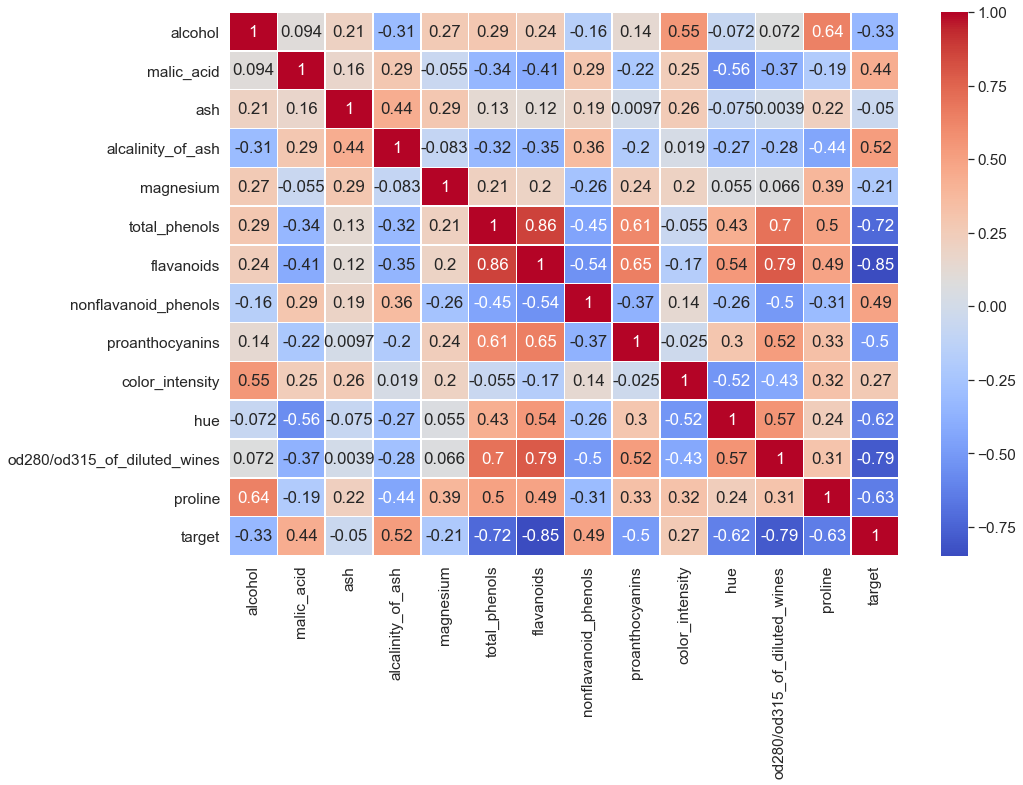

In [470]:
# 8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

X_corr = X.corr()
# X_corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(X_corr, annot=True, linewidths=.5, cmap="coolwarm")
plt.show()

In [404]:
# 9). Создайте список high_corr из признаков, 
# корреляция которых с полем target по абсолютному значению превышает 0.5 
# (причем, само поле target не должно входить в этот список).

high_corr = list(X_corr.loc[np.abs(X_corr["target"]) > 0.5].index)
high_corr.remove("target")
print(high_corr)

['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [407]:
# 10). Удалите из датафрейма X поле с целевой переменной. 
# Для всех признаков, названия которых содержатся в списке high_corr, 
# вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', 
# добавленного к первоначальному названию признака. 
# Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, 
# а также поля с признаками из списка high_corr, возведенными в квадрат. 
# Выведите описание полей датафрейма X с помощью метода describe.

X = X.drop("target", axis=1)

for i in high_corr:
    X[i + "_2"] = np.square(X[i])

# Меняем местами колонки, чтобы изначальные значения и их квадраты были рядом
cols = X.columns.tolist()
for i in range(len(cols) - 1):
    r = cols[i] + "_2"
    if r in cols[i:]:
        cols.remove(r)
        cols = cols[:i+1] + [(cols[i] + "_2")] + cols[i + 1:]

X = X[cols]
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,alcalinity_of_ash_2,magnesium,total_phenols,total_phenols_2,flavanoids,flavanoids_2,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,hue_2,od280/od315_of_diluted_wines,od280/od315_of_diluted_wines_2,proline,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,391.142865,99.741573,2.295112,5.657030,2.029270,5.110049,0.361854,1.590899,5.058090,0.957449,0.968661,2.611685,7.322155,746.893258,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,133.671775,14.282484,0.625851,2.936294,0.998859,4.211441,0.124453,0.572359,2.318286,0.228572,0.443798,0.709990,3.584316,314.907474,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,112.360000,70.000000,0.980000,0.960400,0.340000,0.115600,0.130000,0.410000,1.280000,0.480000,0.230400,1.270000,1.612900,278.000000,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,295.840000,88.000000,1.742500,3.036325,1.205000,1.452100,0.270000,1.250000,3.220000,0.782500,0.612325,1.937500,3.754075,500.500000,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,380.250000,98.000000,2.355000,5.546050,2.135000,4.558250,0.340000,1.555000,4.690000,0.965000,0.931250,2.780000,7.728400,673.500000,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,462.250000,107.000000,2.800000,7.840000,2.875000,8.265700,0.437500,1.950000,6.200000,1.120000,1.254400,3.170000,10.048900,985.000000,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,900.000000,162.000000,3.880000,15.054400,5.080000,25.806400,0.660000,3.580000,13.000000,1.710000,2.924100,4.000000,16.000000,1680.000000,2.822400e+06
